In [1]:
from food_dataset import FoodDataset
from food_model import FoodModel
from train_settings import TrainSettings
from training_loop import TrainingLoop
import constants
from matplotlib import pyplot as plt

path=constants.dataset_root

dt_train = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       800,
                       constants.transform)

dt_val = FoodDataset(path,
                     constants.min_class_names,
                     constants.min_class_labels,
                     800,
                     100,
                     constants.transform)

dt_test = FoodDataset(path,
                      constants.min_class_names,
                      constants.min_class_labels,
                      900,
                      100,
                      constants.transform)

In [2]:
model = FoodModel(10)
sum(p.numel() for p in model.parameters() if p.requires_grad)

68667402

In [3]:
settings = TrainSettings("trying_out",
                         model,
                         dt_train,
                         dt_val,
                         device="cpu",
                         lr=0.001,
                         epochs=20,
                         save_after_epoch=10,
                         eval_after_epoch=1,
                         save_path=constants.save_path,
                         print_after_steps=5,
                         print_memory=True,
                         batch_size=1000)

training = TrainingLoop(settings)

training.train()

Training trying_out for 20 epochs
Training on cpu
[20:18:51] Epoch 1 Step 5, Ellapsed 00:02, Train Loss: 1234.0000, ETA: 01:27
[20:18:52] Epoch 1/20, Ellapsed 00:04 seconds, Train Loss: 0.0000, Validation Loss: 0.0000 Evaluations: [] ETA: 01:16
[20:18:55] Epoch 2 Step 5, Ellapsed 00:06, Train Loss: 1234.0000, ETA: 01:17
[20:18:56] Epoch 2/20, Ellapsed 00:08 seconds, Train Loss: 0.0000, Validation Loss: 0.0000 Evaluations: [] ETA: 01:12
[20:18:59] Epoch 3 Step 5, Ellapsed 00:10, Train Loss: 1234.0000, ETA: 01:11
[20:19:00] Epoch 3/20, Ellapsed 00:12 seconds, Train Loss: 0.0000, Validation Loss: 0.0000 Evaluations: [] ETA: 01:08
[20:19:03] Epoch 4 Step 5, Ellapsed 00:14, Train Loss: 1234.0000, ETA: 01:07
[20:19:04] Epoch 4/20, Ellapsed 00:16 seconds, Train Loss: 0.0000, Validation Loss: 0.0000 Evaluations: [] ETA: 01:04
[20:19:07] Epoch 5 Step 5, Ellapsed 00:18, Train Loss: 1234.0000, ETA: 01:02
[20:19:08] Epoch 5/20, Ellapsed 00:20 seconds, Train Loss: 0.0000, Validation Loss: 0.0000 Ev

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9466565..2.0996952].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].


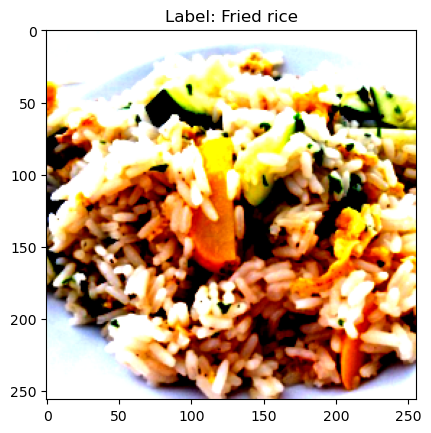

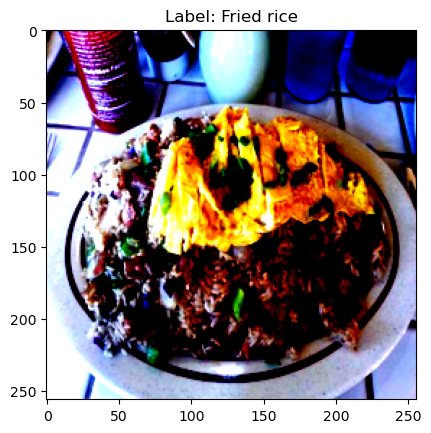

In [4]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Label: {label}")
    
show_image(dt_train[799][0],dt_train.get_class_label(dt_train[799][1]))
show_image(dt_val[0][0],dt_val.get_class_label(dt_val[0][1]))